In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [189]:
df = pd.read_csv('/content/dataset_nn.csv')
df.head()

,Kota/Kabupaten,PPP,TPT,UM,UMK
0,Kabupaten Pacitan,0.88,0.15,1.11,1961154.77
1,Kabupaten Ponorogo,0.92,0.82,1.10,1954281.32
2,Kabupaten Trenggalek,0.92,0.81,1.10,1944932.74
3,Kabupaten Tulungagung,0.96,0.70,1.14,2029358.67
4,Kabupaten Blitar,0.96,0.69,1.13,2015071.18


In [190]:
def normalize(target):
    arr = []
    for i in range(len(target)):
        arr.append(target[i])

    normalized = []
    for i in range(len(arr)):
        normalized.append((arr[i] - np.min(arr)) / (np.max(arr) - np.min(arr)))
    return normalized

def normalize1(target):
    arr = []
    for i in range(len(target)):
        arr.append(target[i][0])

    normalized = []
    for i in range(len(arr)):
        normalized.append([(arr[i] - np.min(arr)) / (np.max(arr) - np.min(arr))])
    return normalized

In [191]:
x_train = []
y_train = []

x_test = []
y_test = []

x = []
y = []

In [192]:
for i in range(len(df["PPP"])):
    x.append([
        df["PPP"][i],
        df["TPT"][i],
        df["UM"][i],
        ])
    y.append([df["UMK"][i]])

In [193]:
x = np.array(x)
transpose = x.T

In [194]:
len(y)

76

In [195]:
x_norm = []
y_norm = normalize1(y)
y_norm_1 = normalize1(y)
for i in range(len(transpose)):
    x_norm.append(normalize(transpose[i]))

In [196]:
kota_kab = []
for i in range(len(df["Kota/Kabupaten"])):
    if(i < 38):
        kota_kab.append(df["Kota/Kabupaten"][i])

In [197]:
for i in range(len(x_norm)):
    x_norm_temp_2 = []
    x_norm_temp_3 = []
    for j in range(len(x_norm[0])):
        if(j < 38):
            x_norm_temp_2.append(x_norm[i][j])
        if(j >= 38):
            x_norm_temp_3.append(x_norm[i][j])
    x_train.append(x_norm_temp_2)
    x_test.append(x_norm_temp_3)
    
for i in range(len(y_norm)):   
    if(i < 38):
        y_train.append(y_norm[i])
    if(i >= 38):
        y_test.append(y_norm[i])

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

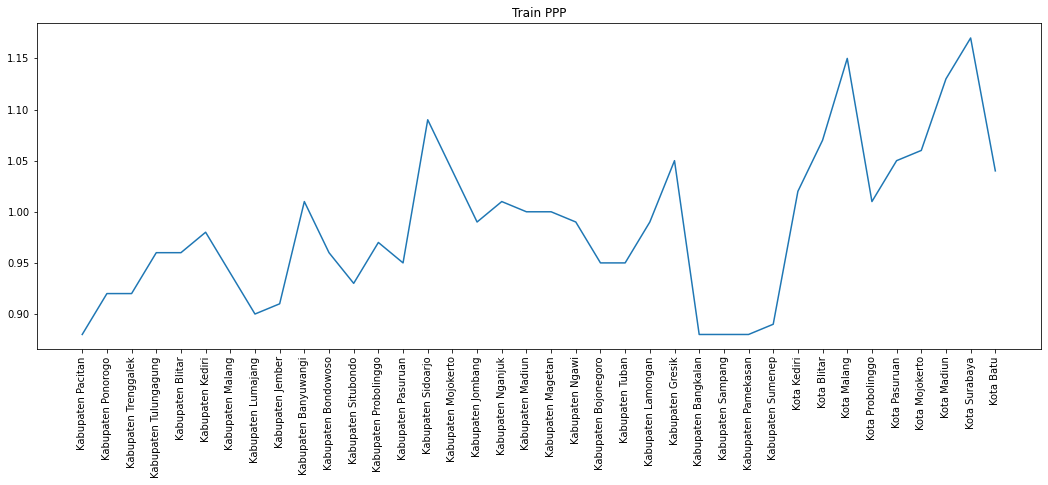

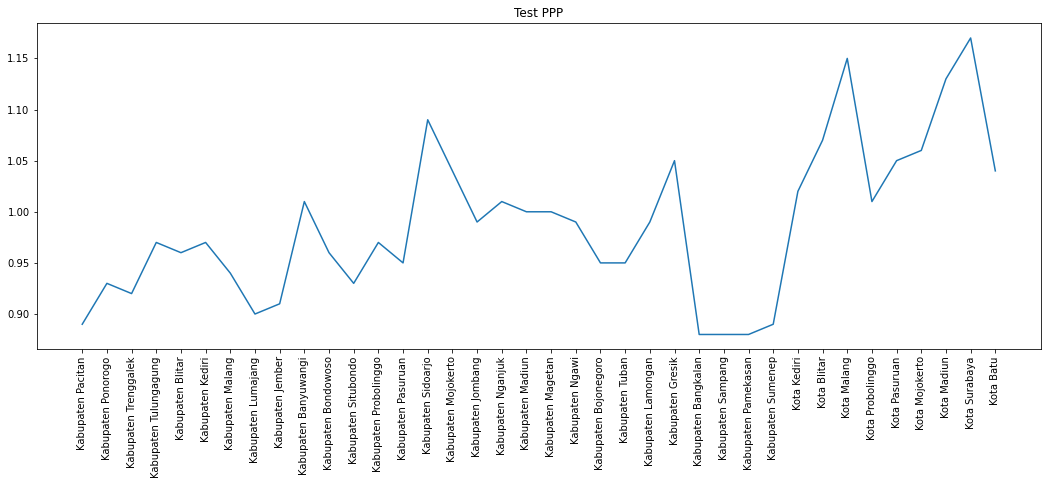

In [198]:
ppp_train_plot = []
ppp_test_plot = []
for i in range(len(df["PPP"])):
    if(i < 38):
        ppp_train_plot.append([df["PPP"][i]])
    if(i >= 38):
        ppp_test_plot.append([df["PPP"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, ppp_train_plot)
plt.title("Train PPP")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, ppp_test_plot)
plt.title("Test PPP")
plt.show()

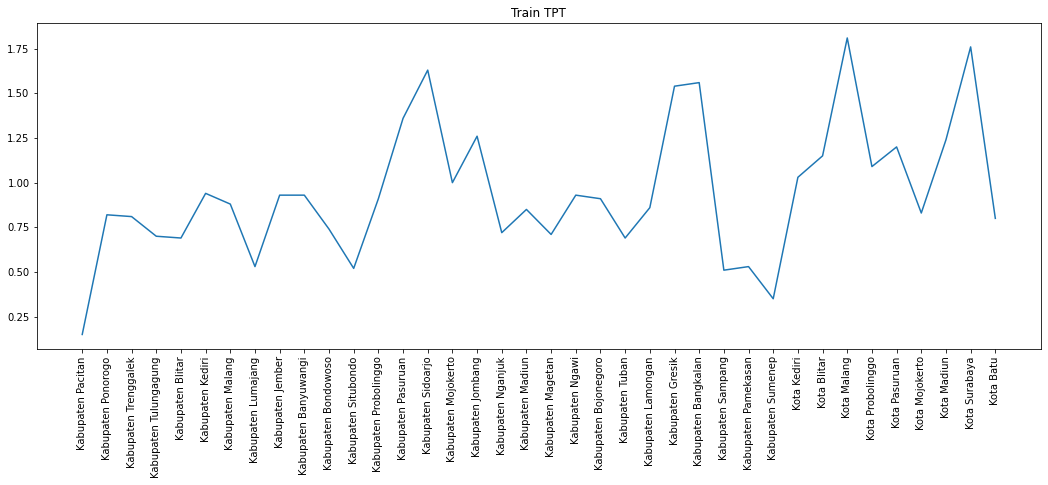

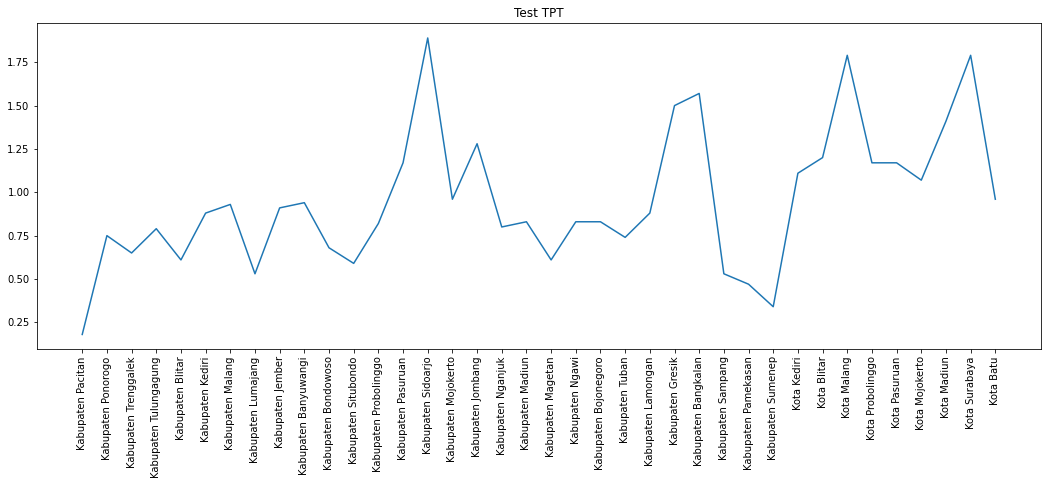

In [199]:
tpt_train_plot = []
ppp_test_plot = []
for i in range(len(df["TPT"])):
    if(i < 38):
        tpt_train_plot.append([df["TPT"][i]])
    if(i >= 38):
        ppp_test_plot.append([df["TPT"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, tpt_train_plot)
plt.title("Train TPT")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, ppp_test_plot)
plt.title("Test TPT")
plt.show()

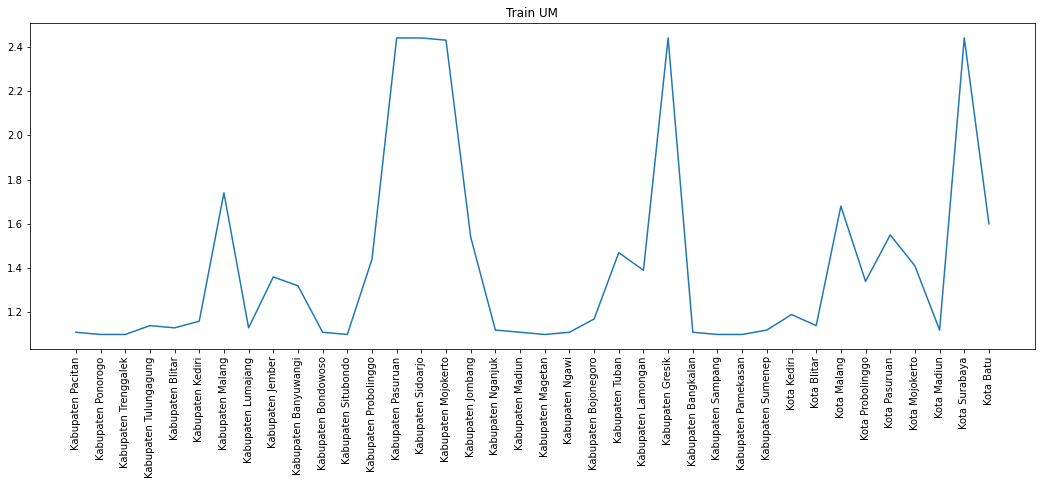

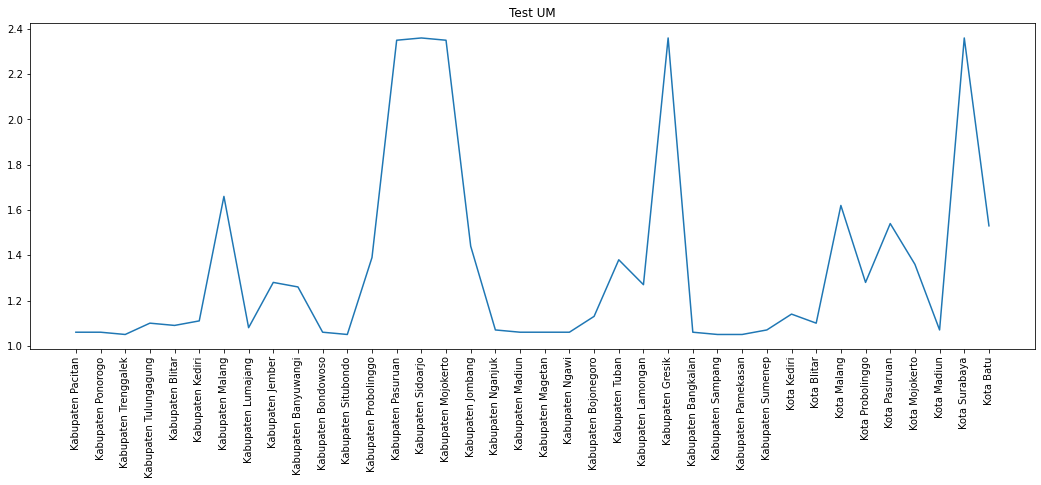

In [200]:
um_train_plot = []
um_test_plot = []
for i in range(len(df["UM"])):
    if(i < 38):
        um_train_plot.append([df["UM"][i]])
    if(i >= 38):
        um_test_plot.append([df["UM"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, um_train_plot)
plt.title("Train UM")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, um_test_plot)
plt.title("Test UM")
plt.show()

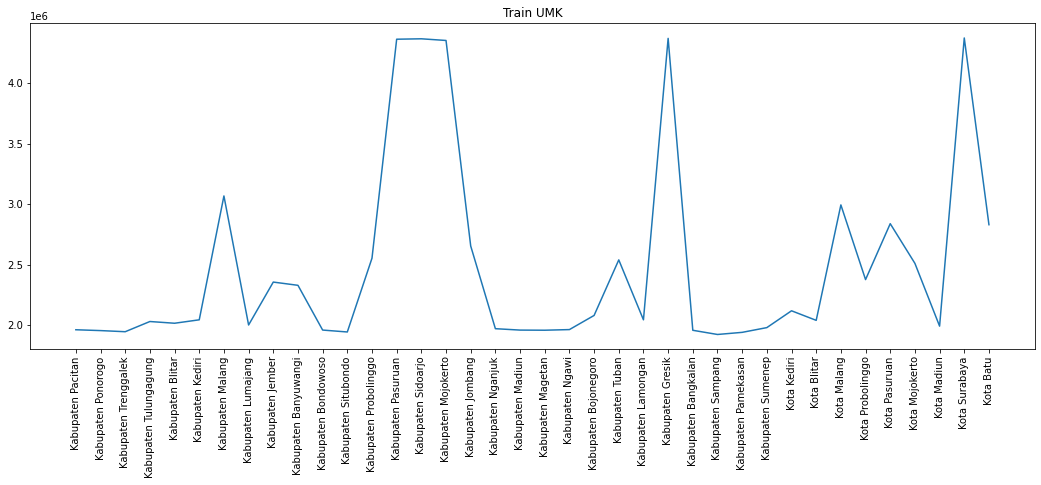

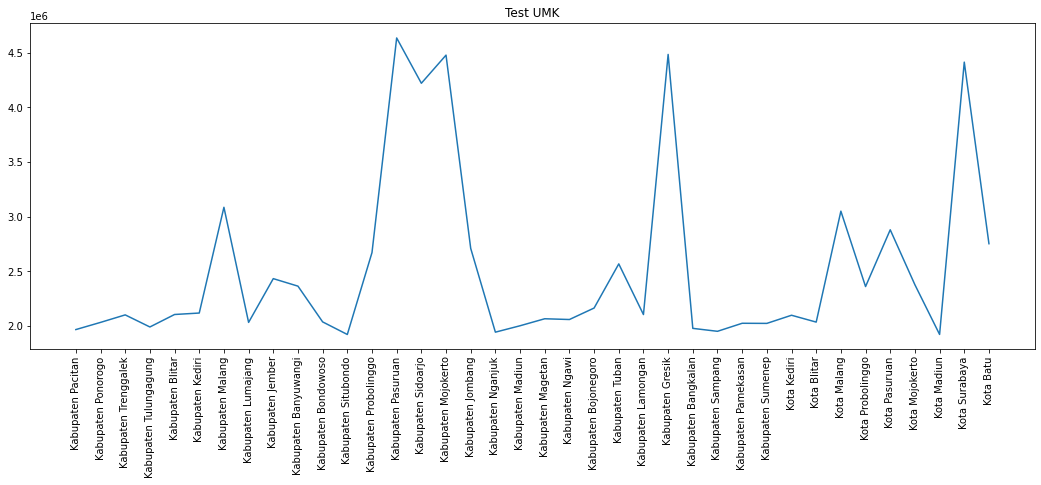

In [201]:
y_train_plot = []
y_test_plot = []
for i in range(len(df["UMK"])):
    if(i < 38):
        y_train_plot.append([df["UMK"][i]])
    if(i >= 38):
        y_test_plot.append([df["UMK"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, y_train_plot)
plt.title("Train UMK")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, y_test_plot)
plt.title("Test UMK")
plt.show()

In [202]:
np.random.seed(250)

class Layer_1:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 1 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_1:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 1 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_1.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_1.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            # if((i+1) % 5 == 0):
            print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(250)

class Layer_2:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 2 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_2:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 2 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_2.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_2.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            # if((i+1) % 5 == 0):
            print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

class Layer_3:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 3 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r

np.random.seed(250)

class NeuralNetwork_3:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 3 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_3.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_3.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            # if((i+1) % 5 == 0):
            print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
            
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(250)

class Layer_4:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 4 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_4:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 4 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_4.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_4.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            # if((i+1) % 5 == 0):
            print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

In [203]:
def denormalize_data(normalized, target):
    arr = []
    norm = []
    for i in range(len(target)):
        arr.append(target[i])
    for i in range(len(normalized)):
        norm.append(normalized[i])

    denormalize = []
    for i in range(len(norm)):
        denormalize.append([norm[i][0] * (np.max(arr) - np.min(arr)) + np.min(arr)])
    return denormalize

In [ ]:
nn_1 = NeuralNetwork_1()
nn_1.add_layer(Layer_1(3, 2, 'sigmoid'))
nn_1.add_layer(Layer_1(2, 1, 'sigmoid'))
errors_1 = nn_1.train(x_train.T, y_train, 0.1, 2500)

nn_2 = NeuralNetwork_2()
nn_2.add_layer(Layer_2(3, 3, 'sigmoid'))
nn_2.add_layer(Layer_2(3, 1, 'sigmoid'))
errors_2 = nn_2.train(x_train.T, y_train, 0.15, 2500)

nn_3 = NeuralNetwork_3()
nn_3.add_layer(Layer_3(3, 4, 'sigmoid'))
nn_3.add_layer(Layer_3(4, 1, 'sigmoid'))
errors_3 = nn_3.train(x_train.T, y_train, 0.2, 2500)

nn_4 = NeuralNetwork_4()
nn_4.add_layer(Layer_4(3, 5, 'sigmoid'))
nn_4.add_layer(Layer_4(5, 1, 'sigmoid'))
errors_4 = nn_4.train(x_train.T, y_train, 0.25, 2500)

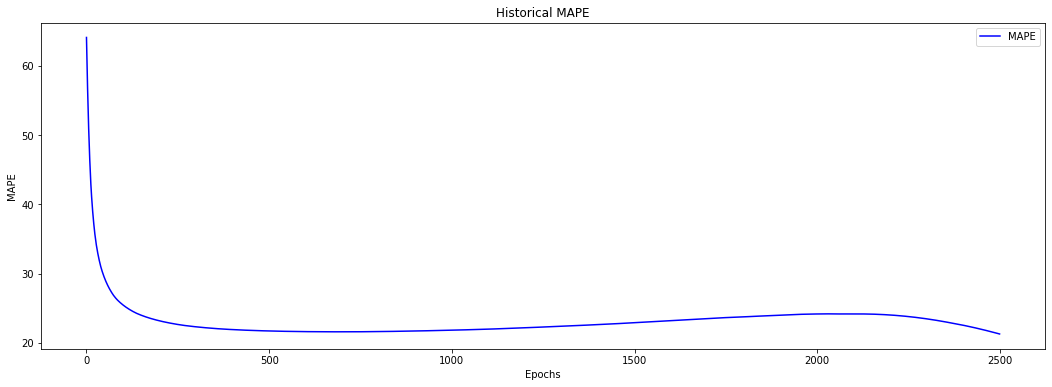

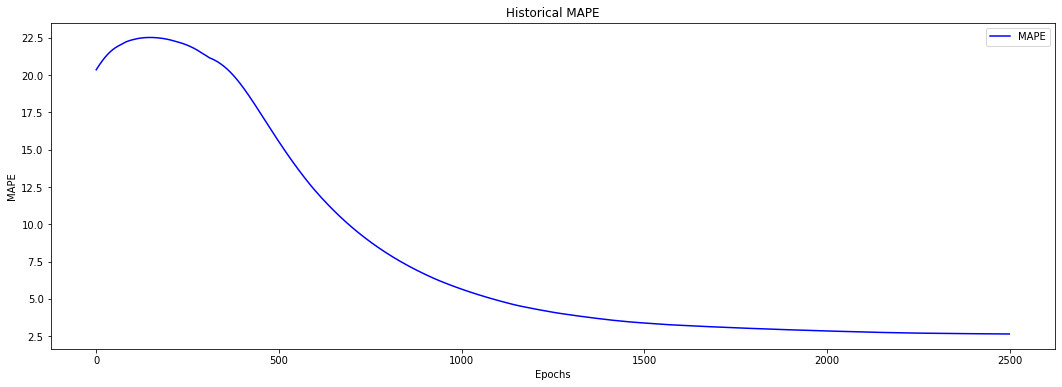

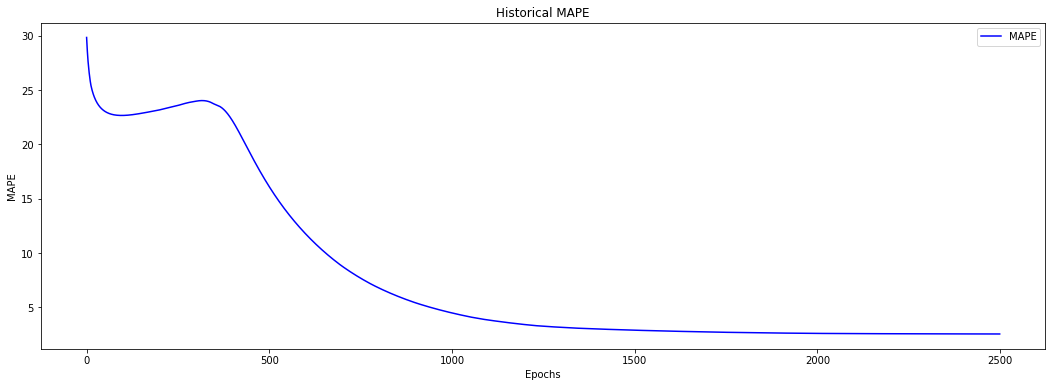

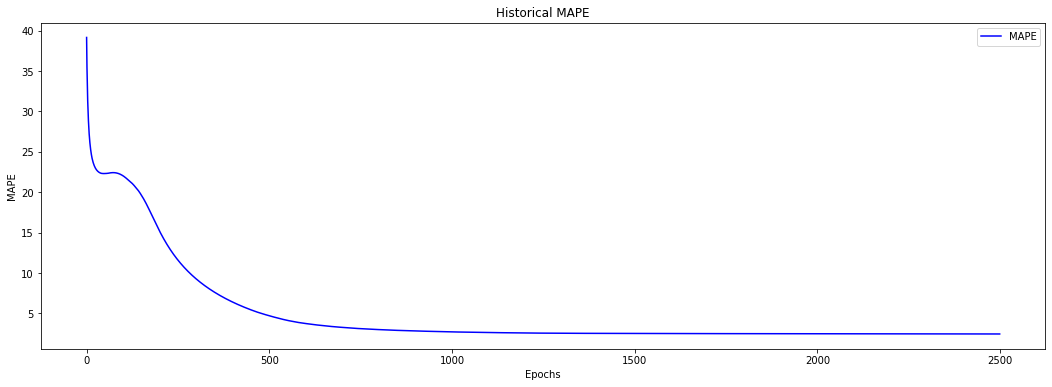

In [205]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()

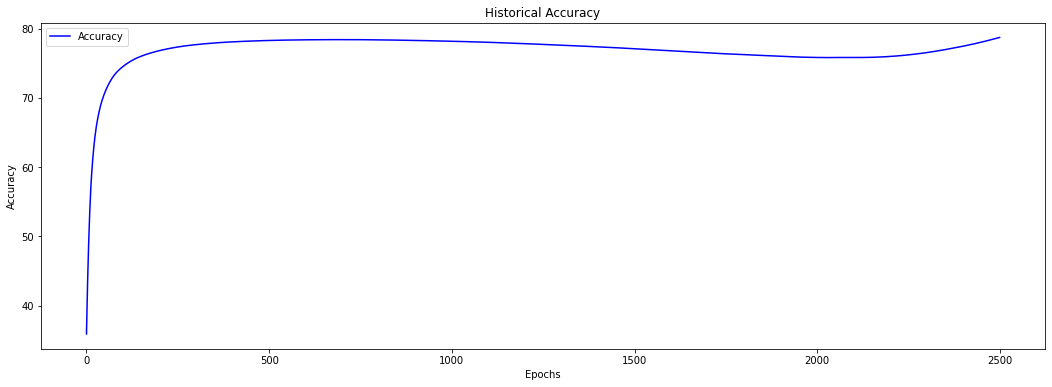

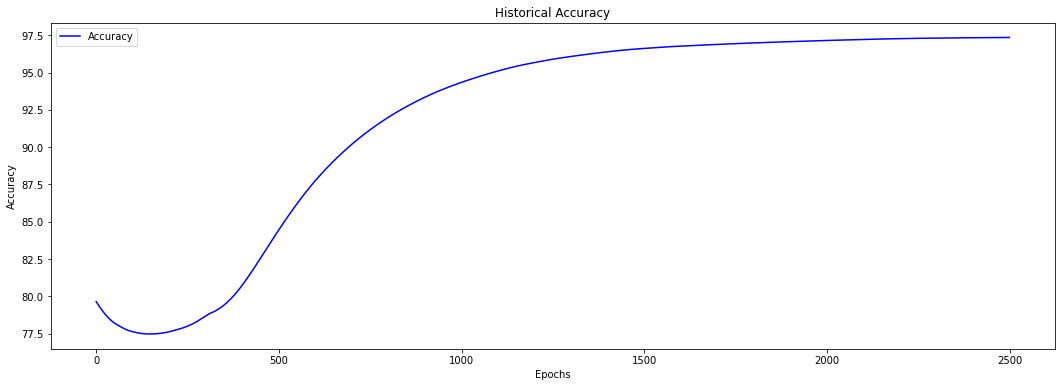

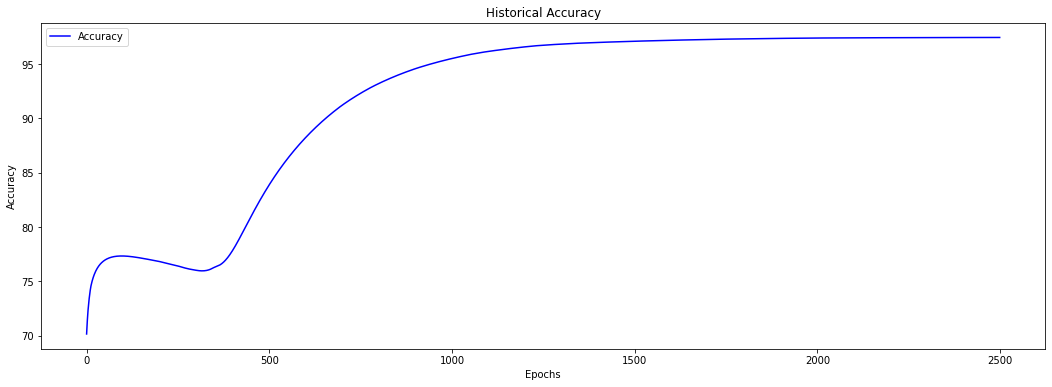

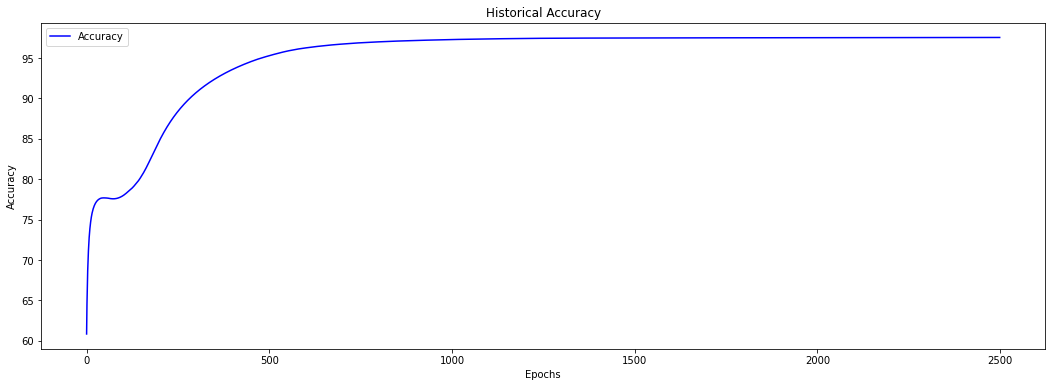

In [206]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

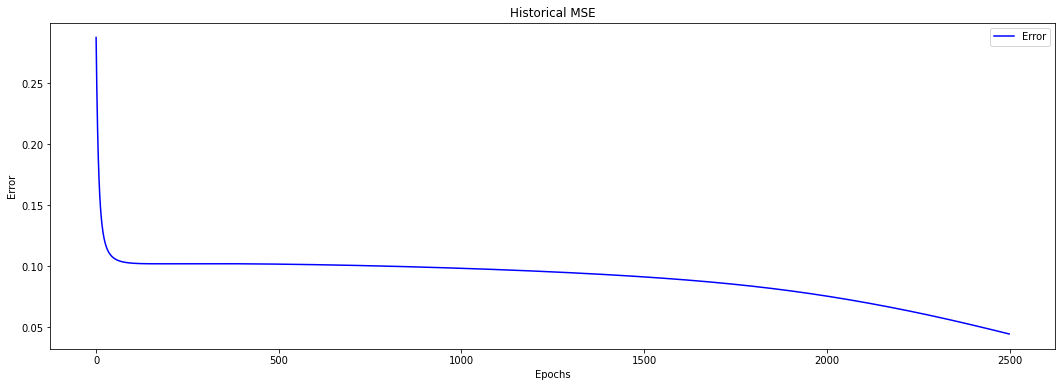

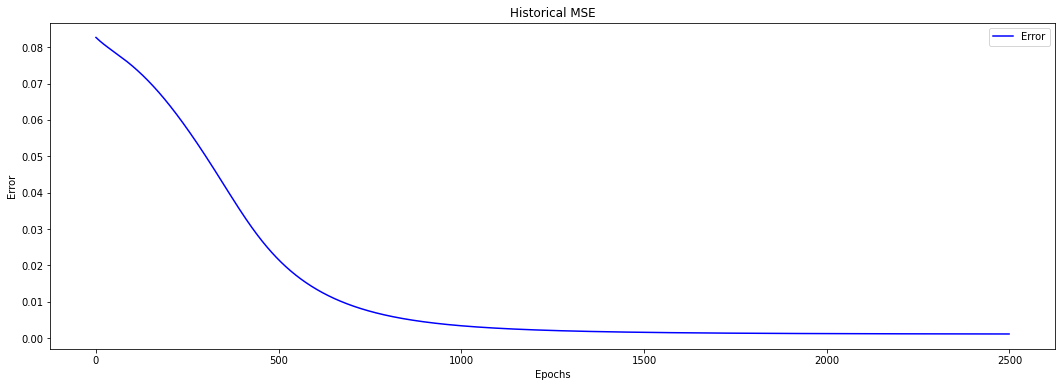

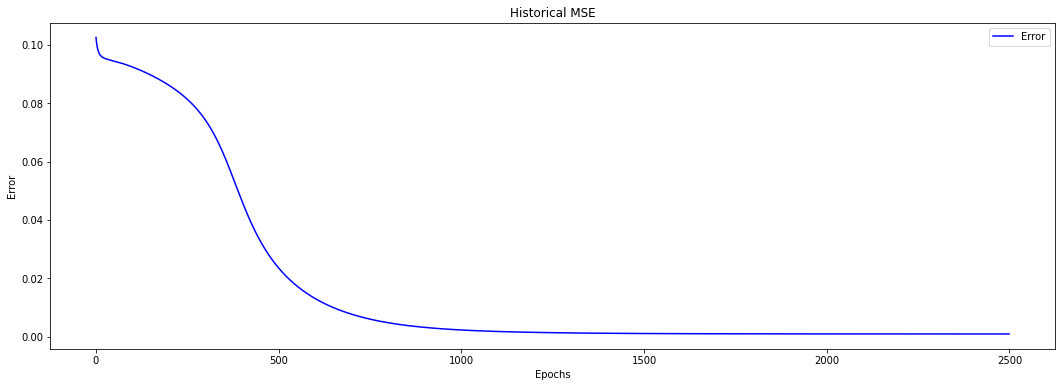

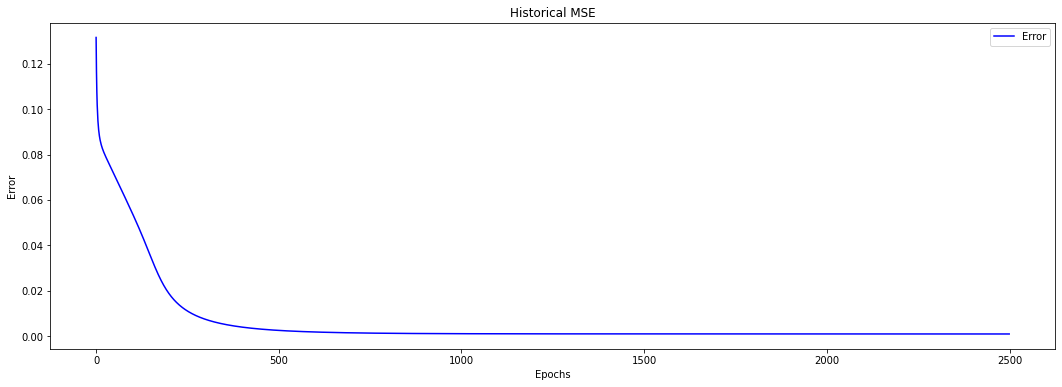

In [207]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[0], c = 'b', label = 'Error')
plt.title('Historical MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[0], c = 'b', label = 'Error')
plt.title('Historical MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[0], c = 'b', label = 'Error')
plt.title('Historical MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[0], c = 'b', label = 'Error')
plt.title('Historical MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [208]:
def denormalize(normalized, target):
    arr = []
    norm = []
    for i in range(len(target)):
        arr.append(target[i])
    for i in range(len(normalized)):
        norm.append(normalized[i])

    denormalize = []
    for i in range(len(norm)):
        denormalize.append([norm[i][0] * (np.max(arr) - np.min(arr)) + np.min(arr)])
    return denormalize

In [209]:
arr_1 = y_norm_1
arr_2 = y_norm_1
arr_3 = y_norm_1
arr_4 = y_norm_1
predict_1_1 = nn_1.predict(x_test.T)
for i in range(len(predict_1_1)):
    arr_1.append(predict_1_1[i].tolist())

predict_1_2 = nn_2.predict(x_test.T)
for i in range(len(predict_1_2)):
    arr_2.append(predict_1_2[i].tolist())

predict_1_3 = nn_3.predict(x_test.T)
for i in range(len(predict_1_3)):
    arr_3.append(predict_1_3[i].tolist())

predict_1_4 = nn_4.predict(x_test.T)
for i in range(len(predict_1_4)):
    arr_4.append(predict_1_4[i].tolist())

In [210]:
denormalize_1 = denormalize(arr_1, y)
denormalize_2 = denormalize(arr_2, y)
denormalize_3 = denormalize(arr_3, y)
denormalize_4 = denormalize(arr_4, y)

In [211]:
predicted_1_1 = []
actual_1_1 = []
predicted_2_1 = []
actual_2_1 = []

predicted_1_2 = []
actual_1_2 = []
predicted_2_2 = []
actual_2_2 = []

predicted_1_3 = []
actual_1_3 = []
predicted_2_3 = []
actual_2_3 = []

predicted_1_4 = []
actual_1_4 = []
predicted_2_4 = []
actual_2_4 = []

In [212]:
for i in range(len(denormalize_1)):
    if(i >= 38 and i <= 75):
        actual_1_1.append(denormalize_1[i])
        actual_2_1.append(arr_1[i])
    if(i >= 76 and i <= 113):
        predicted_1_1.append(denormalize_1[i])
        predicted_2_1.append(arr_1[i])

for i in range(len(denormalize_2)):
    if(i >= 38 and i <= 75):
        actual_1_2.append(denormalize_2[i])
        actual_2_2.append(arr_2[i])
    if(i >= 114 and i <= 151):
        predicted_1_2.append(denormalize_2[i])
        predicted_2_2.append(arr_2[i])

for i in range(len(denormalize_3)):
    if(i >= 38 and i <= 75):
        actual_1_3.append(denormalize_3[i])
        actual_2_3.append(arr_3[i])
    if(i >= 152 and i <= 189):
        predicted_1_3.append(denormalize_3[i])
        predicted_2_3.append(arr_3[i])

for i in range(len(denormalize_4)):
    if(i >= 38 and i <= 75):
        actual_1_4.append(denormalize_4[i])
        actual_2_4.append(arr_4[i])
    if(i >= 190 and i <= 227):
        predicted_1_4.append(denormalize_4[i])
        predicted_2_4.append(arr_4[i])

In [213]:
def mse(actual, pred):
    return np.square(np.subtract(actual, pred)).mean()

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [214]:
error_train = np.array([
    ["Model 1", 2, 2000, errors_1[0][-1], errors_1[1][-1], errors_1[2][-1], errors_1[-1]],
    ["Model 2", 3, 3000, errors_2[0][-1], errors_2[1][-1], errors_2[2][-1], errors_2[-1]],
    ["Model 3", 4, 4000, errors_3[0][-1], errors_3[1][-1], errors_3[2][-1], errors_3[-1]],
    ["Model 4", 5, 5000, errors_4[0][-1], errors_4[1][-1], errors_4[2][-1], errors_4[-1]],
])

error_table = pd.DataFrame(error_train, columns = ['Model', 'Hidden Neuron', 'Epoch', 'MSE', 'MAPE', 'Akurasi', 'Elapsed Time'])

error_table

,Model,Hidden Neuron,Epoch,MSE,MAPE,Akurasi,Elapsed Time
0,Model 1,2,2000,0.04449236608340318,21.2891100722936,78.7108899277064,15.741773843765259
1,Model 2,3,3000,0.0011009502437999935,2.6424287735532115,97.3575712264468,16.114864349365234
2,Model 3,4,4000,0.0009307707482226335,2.543117920958775,97.45688207904122,16.861566305160522
3,Model 4,5,5000,0.0008779686992855746,2.4645707975640248,97.53542920243598,15.670340061187744


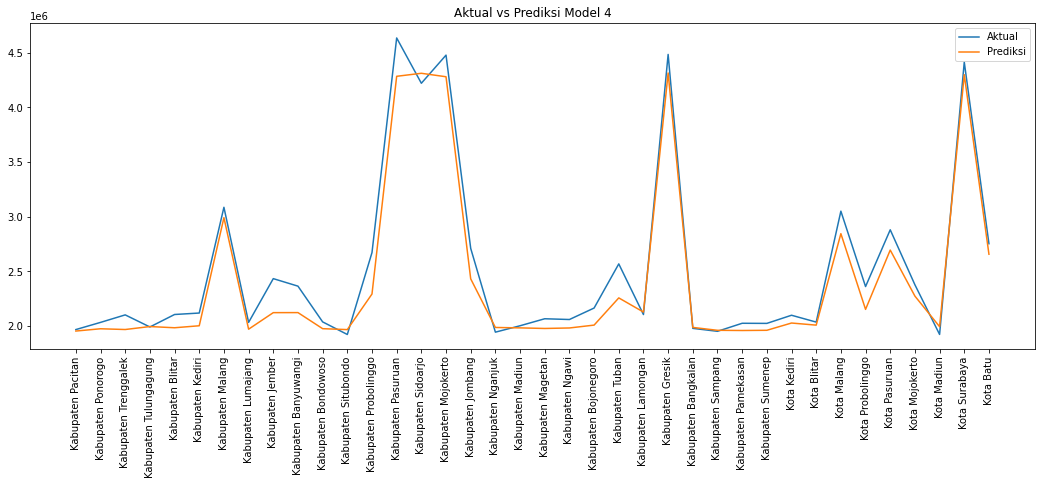

In [215]:
err_list = [errors_1[2][-1], errors_2[2][-1], errors_3[2][-1], errors_4[2][-1]]
max_acc = err_list[0]
best_index = 0
for i in range(1,len(err_list)):
    if err_list[i] > max_acc:
        max_acc = err_list[i]
        best_index = i
        
if(best_index == 0):
    plt.figure(figsize=(18,6))
    plt.xticks(rotation=90)
    plt.title("Aktual vs Prediksi Model 1")
    plt.plot(kota_kab, actual_1_1, label="Aktual")
    plt.plot(predicted_1_1, label="Prediksi")
    plt.legend()
    plt.show()
elif(best_index == 1):
    plt.figure(figsize=(18,6))
    plt.xticks(rotation=90)
    plt.title("Aktual vs Prediksi Model 2")
    plt.plot(kota_kab, actual_1_2, label="Aktual")
    plt.plot(predicted_1_2, label="Prediksi")
    plt.legend()
    plt.show()
elif(best_index == 2):
    plt.figure(figsize=(18,6))
    plt.xticks(rotation=90)
    plt.title("Aktual vs Prediksi Model 3")
    plt.plot(kota_kab, actual_1_3, label="Aktual")
    plt.plot(predicted_1_3, label="Prediksi")
    plt.legend()
    plt.show()
elif(best_index == 3):
    plt.figure(figsize=(18,6))
    plt.xticks(rotation=90)
    plt.title("Aktual vs Prediksi Model 4")
    plt.plot(kota_kab, actual_1_4, label="Aktual")
    plt.plot(predicted_1_4, label="Prediksi")
    plt.legend()
    plt.show()

In [216]:
for i in range(1,len(err_list)):
    if err_list[i] > max_acc:
        max_acc = err_list[i]
        best_index = i
        
if(best_index == 0):
    error_train = np.array([
        ["Model 1", mse(actual_2_1, predicted_2_1), mape(actual_1_1, predicted_1_1), 100 - (mape(actual_1_1, predicted_1_1))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 1):
    error_train = np.array([
        ["Model 2", mse(actual_2_2, predicted_2_2), mape(actual_1_2, predicted_1_2), 100 - (mape(actual_1_2, predicted_1_2))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 2):
    error_train = np.array([
        ["Model 3", mse(actual_2_3, predicted_2_3), mape(actual_1_3, predicted_1_3), 100 - (mape(actual_1_3, predicted_1_3))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 3):
    error_train = np.array([
        ["Model 4", mse(actual_2_4, predicted_2_4), mape(actual_1_4, predicted_1_4), 100 - (mape(actual_1_4, predicted_1_4))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)

,Model,MSE,MAPE,Akurasi
0,Model 4,0.003411217019209326,4.685362585270835,95.31463741472916


In [217]:
error_train_1 = np.array([
        ["Model 1", mse(actual_2_1, predicted_2_1), mape(actual_1_1, predicted_1_1), 100 - (mape(actual_1_1, predicted_1_1))],
        ["Model 2", mse(actual_2_2, predicted_2_2), mape(actual_1_2, predicted_1_2), 100 - (mape(actual_1_2, predicted_1_2))],
        ["Model 3", mse(actual_2_3, predicted_2_3), mape(actual_1_3, predicted_1_3), 100 - (mape(actual_1_3, predicted_1_3))],
        ["Model 4", mse(actual_2_4, predicted_2_4), mape(actual_1_4, predicted_1_4), 100 - (mape(actual_1_4, predicted_1_4))],
])
error_tables_1 = pd.DataFrame(error_train_1, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
display(error_tables_1)

,Model,MSE,MAPE,Akurasi
0,Model 1,0.044469354830669064,18.965164637590156,81.03483536240984
1,Model 2,0.003402780809194746,4.457319913664756,95.54268008633524
2,Model 3,0.003431537701767003,4.601179300975707,95.3988206990243
3,Model 4,0.003411217019209326,4.685362585270835,95.31463741472916


In [218]:
np.random.seed(200)
oke = np.random.uniform(low=-1, high=1, size=(2, 2))
print(oke)

[[ 0.89526451 -0.54690516]
 [ 0.18884029 -0.14338263]]
